In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Convolution1D, MaxPooling1D
from tensorflow import keras
from tensorflow.keras import activations
import numpy as np

In [2]:
class myRepModel(tf.keras.Model):
    def __init__(self, nb_classes):
        super().__init__(name='PaperModel')
        self.conv1 = Convolution1D(filters=5, kernel_size=5, padding='valid',
                                  name='Conv1')
        self.max1 = MaxPooling1D(pool_size=2, padding='valid',
                                name='MaxPool1')
        self.conv2 = Convolution1D(filters=10, kernel_size=5, padding='valid',
                                  name='Conv2')
        self.max2 = MaxPooling1D(pool_size=2, padding='valid',
                                name='MaxPool2')
        
        self.fc1 = Dense(units=500, name='Dense1')
        self.dp = Dropout(0.5, name='Dropout')
        self.fc2 = Dense(nb_classes, name='Dense2')
        
    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.max1(x)
        x = activations.relu(x)
        x = self.conv2(x)
        x = self.max2(x)
        x = activations.relu(x)
        
        x = Flatten(name='Flatten')(x)
        x = self.fc1(x)
        x = self.dp(x)
        x = self.fc2(x)
        x = activations.softmax(x)
        return x
    
    def model(self):
        x = keras.Input(shape=(16384, 1), name='InputTensor')
        return keras.Model(inputs=x, 
                           outputs=self.call(x), 
                           name=self._name)
def myModel(nb_classes):
    model = myRepModel(nb_classes)
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [3]:
myRepModel(2).model().summary()

Model: "PaperModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputTensor (InputLayer)     [(None, 16384, 1)]        0         
_________________________________________________________________
Conv1 (Conv1D)               (None, 16380, 5)          30        
_________________________________________________________________
MaxPool1 (MaxPooling1D)      (None, 8190, 5)           0         
_________________________________________________________________
tf_op_layer_Relu (TensorFlow [(None, 8190, 5)]         0         
_________________________________________________________________
Conv2 (Conv1D)               (None, 8186, 10)          260       
_________________________________________________________________
MaxPool2 (MaxPooling1D)      (None, 4093, 10)          0         
_________________________________________________________________
tf_op_layer_Relu_1 (TensorFl [(None, 4093, 10)]        0

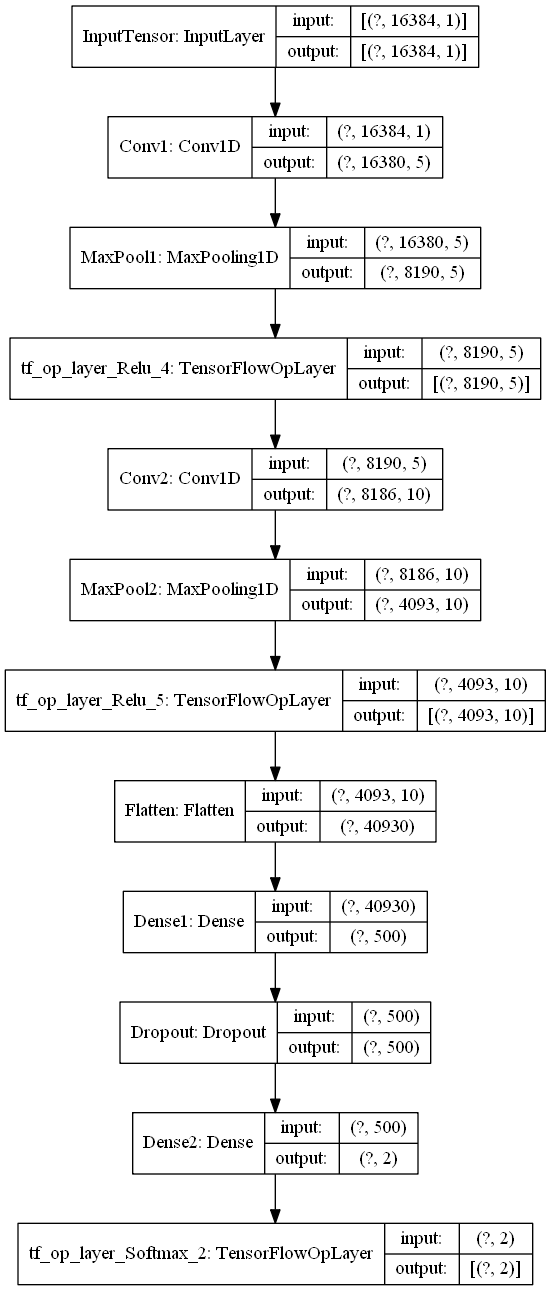

In [9]:
keras.utils.plot_model(myRepModel(2).model(), show_shapes=True)

In [4]:
def load_data(file):
    lista=[]
    records= list(open(file, "r"))
    records=records[1:]
    for seq in records:
        elements=seq.split(",")
        level=elements[-1].split("\n")
        classe=level[0]
        lista.append(classe)

    lista=set(lista)
    classes=list(lista)
    X=[]
    Y=[]
    for seq in records:
        elements=seq.split(",")
        X.append(elements[1:-1])
        level=elements[-1].split("\n")
        classe=level[0]
        Y.append(classe)
    X=np.array(X,dtype=float)
    le = LabelEncoder()
    le.fit(Y)
    Y = le.transform(Y)
    Y=np.array(Y,dtype=int)
    data_max= np.amax(X)
    X = X/data_max
    print(len(X), len(Y))
    return X,Y,len(classes),len(X[0])

In [5]:
def train_and_evaluate_model (model, datatr, labelstr, datate, labelste,nb_classes):


    datatr = datatr.reshape(datatr.shape + (1,))
    datate = datate.reshape(datate.shape + (1,))
    print(datatr.shape, datate.shape)
    labelstr = keras.utils.to_categorical(labelstr, nb_classes)
    labelste_bin = keras.utils.to_categorical(labelste, nb_classes)
    print(labelstr.shape, labelste_bin.shape)

    model.fit(x=datatr, y=labelstr, 
              epochs=100, batch_size=32, verbose = 1)
    
    tr_scores = model.evaluate(datatr,labelstr,verbose=0)
    
    scores = model.evaluate(datate, labelste_bin,verbose=0)
    print(tr_scores)
    print(scores)
    return preds, labelste


In [6]:
if __name__ == "__main__":
    n_folds = 10
    file_name = ['16S_AMP_pos_F.txt']
    
    X,Y,nb_classes,input_length = load_data(file_name)
    
    i=1
    kfold = StratifiedKFold(n_splits=n_folds, shuffle=True)
    for train, test in kfold.split(X, Y):
        model = myModel(nb_classes)
        print('%i fold results:'%i)
        pred,Y_test = train_and_evaluate_model(model, X[train], Y[train], X[test], Y[test],nb_classes)
        print('-'*30)
        i=i+1

479 479
1 fold results:
(431, 16384, 1) (48, 16384, 1)
(431, 2) (48, 2)
Epoch 1/100
14/14 [==============================] - 3s 198ms/step - loss: 0.1141 - accuracy: 0.9350
Epoch 2/100
14/14 [==============================] - 3s 199ms/step - loss: 9.9217e-05 - accuracy: 1.0000
Epoch 3/100
14/14 [==============================] - 3s 189ms/step - loss: 6.1780e-06 - accuracy: 1.0000
Epoch 4/100
14/14 [==============================] - 3s 182ms/step - loss: 3.3102e-06 - accuracy: 1.0000
Epoch 5/100
14/14 [==============================] - 2s 177ms/step - loss: 2.9228e-06 - accuracy: 1.0000
Epoch 6/100
14/14 [==============================] - 3s 182ms/step - loss: 4.0019e-06 - accuracy: 1.0000
Epoch 7/100
14/14 [==============================] - 3s 190ms/step - loss: 2.8189e-06 - accuracy: 1.0000
Epoch 8/100
14/14 [==============================] - 3s 196ms/step - loss: 2.0890e-06 - accuracy: 1.0000
Epoch 9/100
14/14 [==============================] - 3s 186ms/step - loss: 1.9662e-06 - accu

14/14 [==============================] - 2s 169ms/step - loss: 7.3268e-07 - accuracy: 1.0000
Epoch 78/100
14/14 [==============================] - 2s 164ms/step - loss: 8.2754e-07 - accuracy: 1.0000
Epoch 79/100
14/14 [==============================] - 2s 166ms/step - loss: 1.0377e-06 - accuracy: 1.0000
Epoch 80/100
14/14 [==============================] - 2s 167ms/step - loss: 6.1236e-07 - accuracy: 1.00001s - loss: 6.8359e
Epoch 81/100
14/14 [==============================] - 2s 171ms/step - loss: 6.2481e-07 - accuracy: 1.0000
Epoch 82/100
14/14 [==============================] - 2s 172ms/step - loss: 5.1915e-07 - accuracy: 1.0000
Epoch 83/100
14/14 [==============================] - 2s 173ms/step - loss: 4.6356e-07 - accuracy: 1.0000
Epoch 84/100
14/14 [==============================] - 2s 175ms/step - loss: 5.5511e-07 - accuracy: 1.0000
Epoch 85/100
14/14 [==============================] - 2s 169ms/step - loss: 6.0102e-07 - accuracy: 1.0000
Epoch 86/100
14/14 [=====================

NameError: name 'preds' is not defined

In [ ]:
datatr = datatr.reshape(datatr.shape + (1,))
labelstr = keras.utils.to_categorical(labelstr, nb_classes)
labelste_bin = keras.utils.to_categorical(labelste, nb_classes)

model.fit(datatr, labelstr, nb_epoch=100, batch_size=20, verbose = 0)